In [4]:

!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade statsmodels
# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install --upgrade seaborn

Requirement already up-to-date: numpy in c:\users\dev\anaconda3\lib\site-packages
Requirement already up-to-date: pandas in c:\users\dev\anaconda3\lib\site-packages
Requirement already up-to-date: python-dateutil>=2 in c:\users\dev\anaconda3\lib\site-packages (from pandas)
  Using cached pytz-2018.3-py2.py3-none-any.whl
Requirement already up-to-date: numpy>=1.9.0 in c:\users\dev\anaconda3\lib\site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in c:\users\dev\anaconda3\lib\site-packages (from python-dateutil>=2->pandas)
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-2017.3
Requirement already up-to-date: matplotlib in c:\users\dev\anaconda3\lib\site-packages
Requirement already up-to-date: numpy>=1.7.1 in c:\users\dev\anaconda3\lib\site-packages (from matplotlib)
Requirement already up-to-date: six>=1.10 in c:\users\dev\anaconda3\lib\site-packages (from matplotlib)
Requirement already up-to-date: python-dat

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [6]:

# Bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [8]:
# %load ../../../load_magic/storage1.py

current_directory = !echo %cd%
folder_list = current_directory[0].split('\\')
%run ../../../load_magic/storage2.py {len(folder_list) - folder_list.index('ipynb')}
%who

data_folder = ../../data/
saves_folder = ../../saves/
attempt_to_pickle	 current_directory	 data_folder	 encoding	 folder_list	 load_csv	 load_dataframes	 load_object	 np	 
os	 pd	 pickle	 plt	 save_dataframes	 saves_folder	 sm	 smf	 sns	 
store_objects	 sys	 


In [10]:

gapminder_df = load_object('gapminder_df')
gapminder_df.columns = ['country_name', 'income_per_person', 'alcohol_consumption', 'armed_forces_rate',
                        'breast_cancer_per100th', 'co2_emissions', 'female_employ_rate', 'hiv_rate',
                        'internet_use_rate', 'life_expectancy', 'oil_per_person', 'polity_score',
                        'electricity_per_person', 'suicide_per100th', 'employ_rate', 'urban_rate']
store_objects(gapminder_df=gapminder_df)

Pickling to ../../saves/pickle/gapminder_df.pickle


In [11]:

# Convert to numeric format
gapminder_df['internet_use_rate'] = pd.to_numeric(gapminder_df['internet_use_rate'], errors='coerce')
gapminder_df['urban_rate'] = pd.to_numeric(gapminder_df['urban_rate'], errors='coerce')
gapminder_df['female_employ_rate'] = pd.to_numeric(gapminder_df['female_employ_rate'], errors='coerce')
store_objects(gapminder_df=gapminder_df)

Pickling to ../../saves/pickle/gapminder_df.pickle


In [12]:

# Listwise deletion of missing values
sub1_df = gapminder_df[['urban_rate', 'female_employ_rate', 'internet_use_rate']].dropna()


## POLYNOMIAL REGRESSION

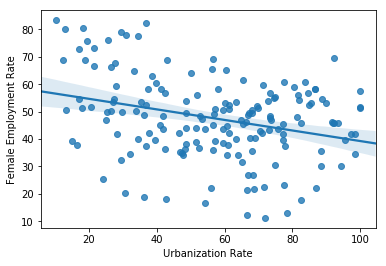

In [15]:

# First order (linear) scatterplot
scat1_axes_subplot = sns.regplot(x='urban_rate', y='female_employ_rate', scatter=True, data=sub1_df)
xlabel_text = plt.xlabel('Urbanization Rate')
ylabel_text = plt.ylabel('Female Employment Rate')

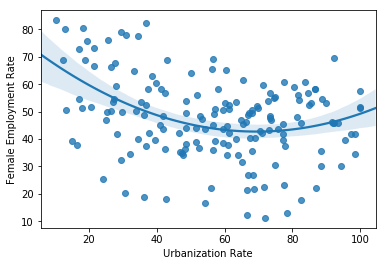

In [16]:

# Fit second order polynomial
# Run the 2 scatterplots together to get both linear and second order fit lines
scat1_axes_subplot = sns.regplot(x='urban_rate', y='female_employ_rate', scatter=True, order=2, data=sub1_df)
xlabel_text = plt.xlabel('Urbanization Rate')
ylabel_text = plt.ylabel('Female Employment Rate')

In [17]:

# Center quantitative IVs for regression analysis
sub1_df['urban_rate_c'] = (sub1_df['urban_rate'] - sub1_df['urban_rate'].mean())
sub1_df['internet_use_rate_c'] = (sub1_df['internet_use_rate'] - sub1_df['internet_use_rate'].mean())
sub1_df[['urban_rate_c', 'internet_use_rate_c']].describe()

,urban_rate_c,internet_use_rate_c
count,167.00,167.00
mean,0.00,0.00
std,23.31,27.74
min,-46.44,-34.01
25%,-19.75,-24.50
50%,2.74,-4.34
75%,16.73,19.16
max,43.16,61.42


In [20]:

# Linear regression analysis
reg1_lrr = smf.ols('female_employ_rate ~ urban_rate_c', data=sub1_df).fit()
print (reg1_lrr.summary())

                            OLS Regression Results                            
Dep. Variable:     female_employ_rate   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     16.69
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           6.84e-05
Time:                        08:01:39   Log-Likelihood:                -678.68
No. Observations:                 167   AIC:                             1361.
Df Residuals:                     165   BIC:                             1368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.6024      1.096     43.416   

In [21]:

# Quadratic (polynomial) regression analysis
reg2_lrr = smf.ols('female_employ_rate ~ urban_rate_c + I(urban_rate_c**2)', data=sub1_df).fit()
print (reg2_lrr.summary())

                            OLS Regression Results                            
Dep. Variable:     female_employ_rate   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.60
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           6.30e-07
Time:                        08:03:24   Log-Likelihood:                -672.19
No. Observations:                 167   AIC:                             1350.
Df Residuals:                     164   BIC:                             1360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.8428 


## EVALUATING MODEL FIT

In [22]:

# Adding internet use rate
reg3_lrr = smf.ols('female_employ_rate  ~ urban_rate_c + I(urban_rate_c**2) + internet_use_rate_c', data=sub1_df).fit()
print (reg3_lrr.summary())

                            OLS Regression Results                            
Dep. Variable:     female_employ_rate   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.92
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           4.25e-07
Time:                        08:04:06   Log-Likelihood:                -670.17
No. Observations:                 167   AIC:                             1348.
Df Residuals:                     163   BIC:                             1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.9886 

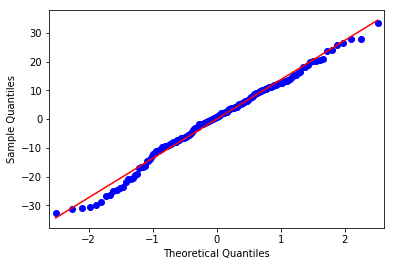

In [26]:

# Q-Q plot for normality
fig4_fig = sm.qqplot(reg3_lrr.resid, line='r')

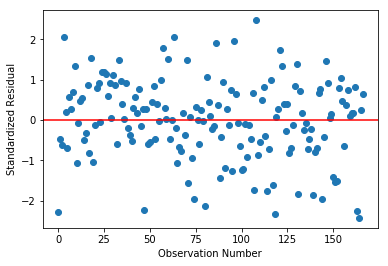

In [32]:

# Simple plot of residuals
stdres_df = pd.DataFrame(reg3_lrr.resid_pearson)
plot_list = plt.plot(stdres_df, 'o', ls='None')
l_l2d = plt.axhline(y=0, color='r')
ylabel_text = plt.ylabel('Standardized Residual')
xlabel_text = plt.xlabel('Observation Number')

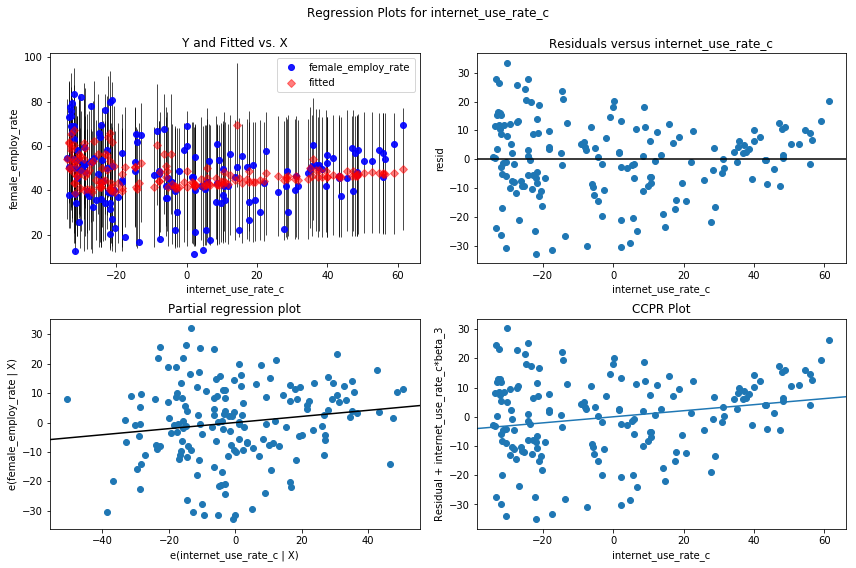

In [34]:

# Additional regression diagnostic plots
fig2_fig = plt.figure(figsize=(12, 8))
fig2_fig = sm.graphics.plot_regress_exog(reg3_lrr, 'internet_use_rate_c', fig=fig2_fig)

Figure(432x288)


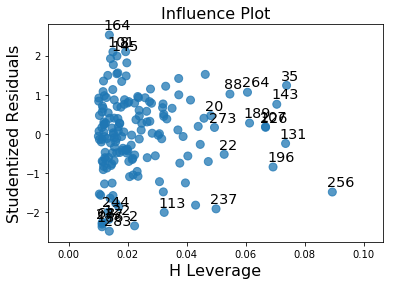

In [36]:

# Leverage plot
fig3_fig = sm.graphics.influence_plot(reg3_lrr, size=8)
print(fig3_fig)